In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

sns.set(rc={'figure.figsize':(12,10)})

In [3]:
data=pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

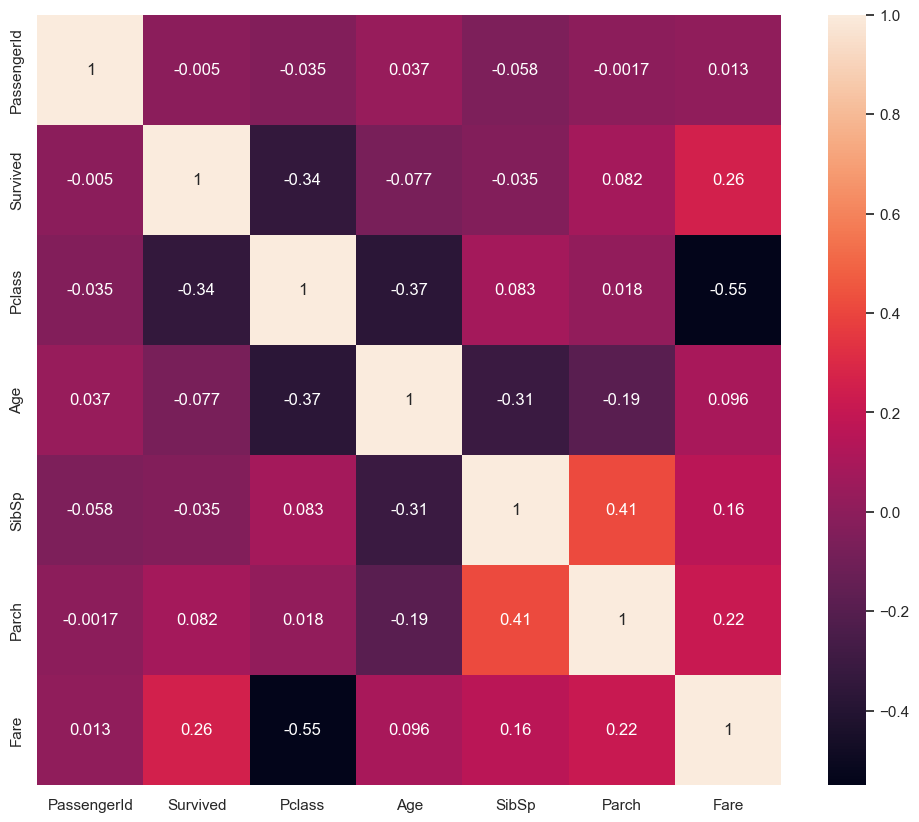

In [5]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

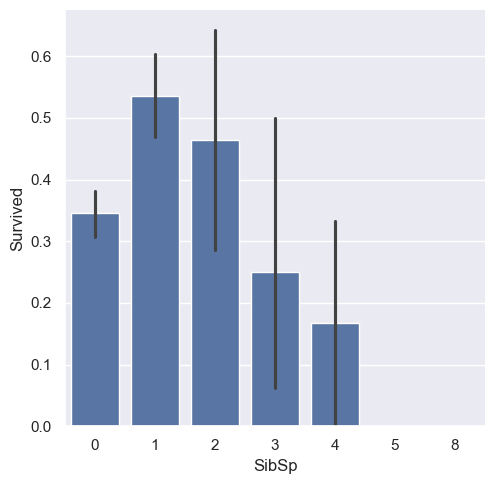

In [6]:
sns.catplot(x='SibSp',y='Survived',data=data,kind='bar')

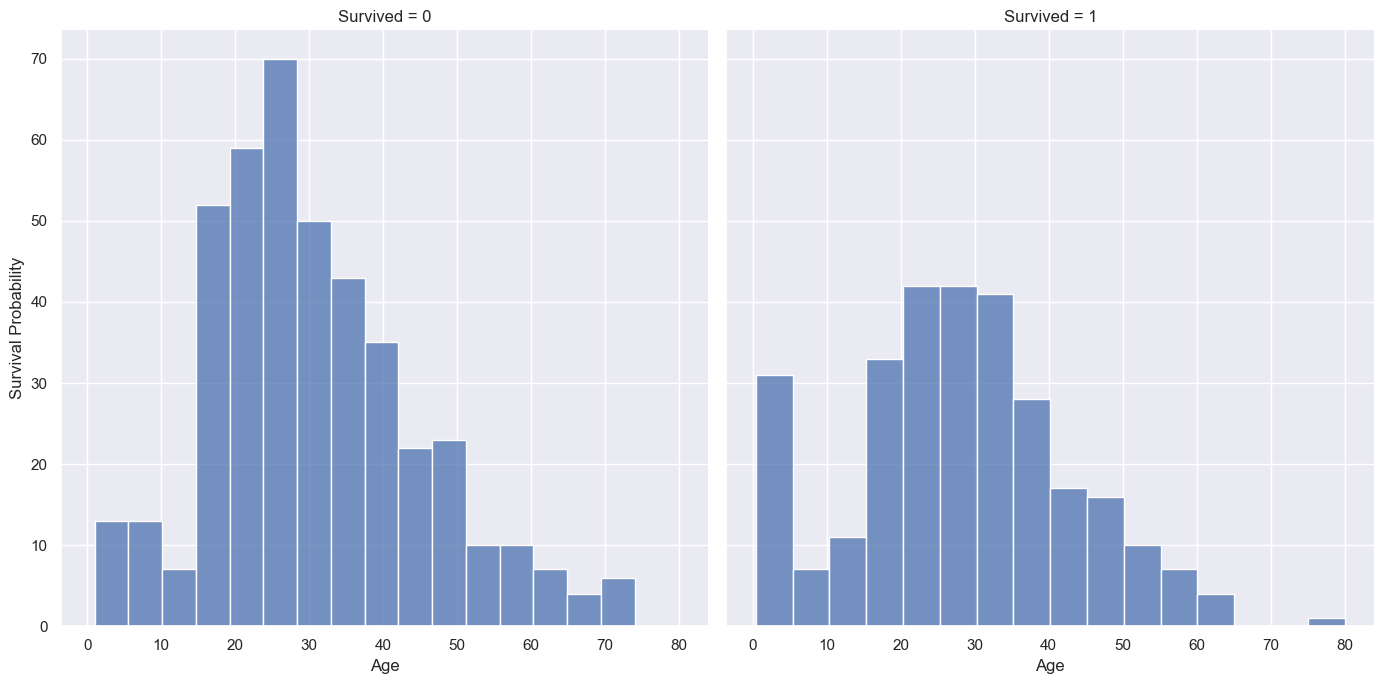

In [7]:
age_visual=sns.FacetGrid(data,col='Survived',height=7)
age_visual.map(sns.histplot,'Age').set_ylabels("Survival Probability")

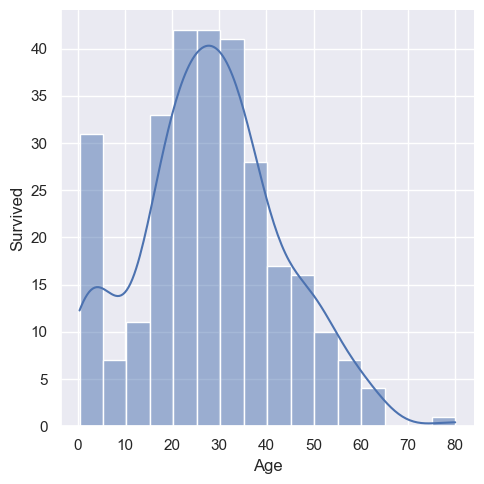

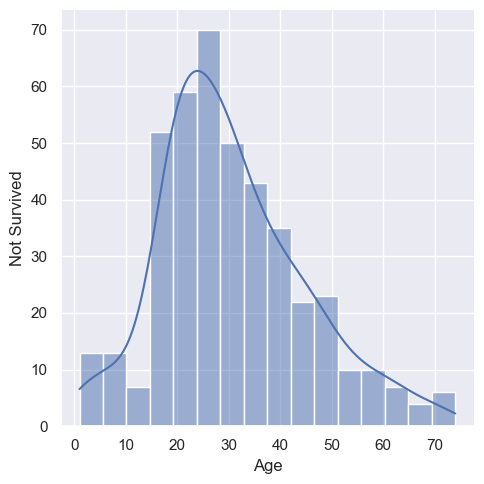

In [85]:
sns.displot(data[data['Survived']==1],x='Age',kde='True').set_ylabels('Survived')
sns.displot(data[data['Survived']==0],x='Age',kde='True').set_ylabels('Not Survived')

In [32]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


<Axes: xlabel='Sex', ylabel='Survived'>

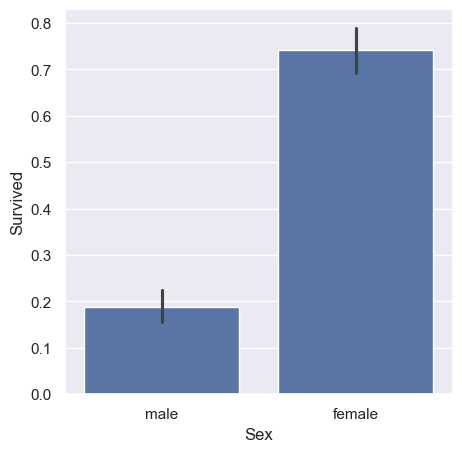

In [56]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data,x='Sex',y='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

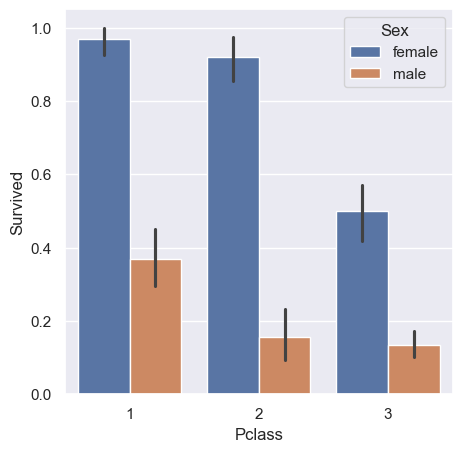

In [58]:
sns.barplot(data,x='Pclass',y='Survived',hue='Sex')

In [65]:
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [8]:
data['Embarked'].fillna('S',inplace=True)
data['Embarked'].isna().sum()

0

<Axes: xlabel='Embarked', ylabel='Survived'>

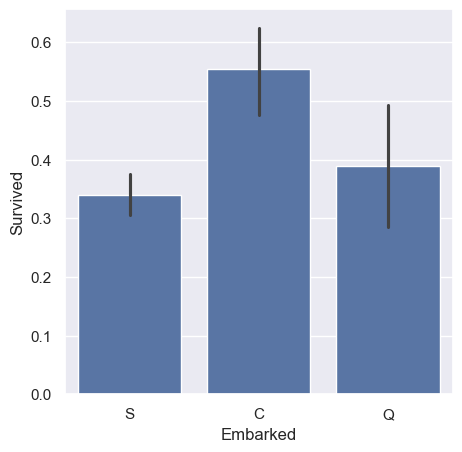

In [62]:
sns.barplot(data,x='Embarked',y='Survived')

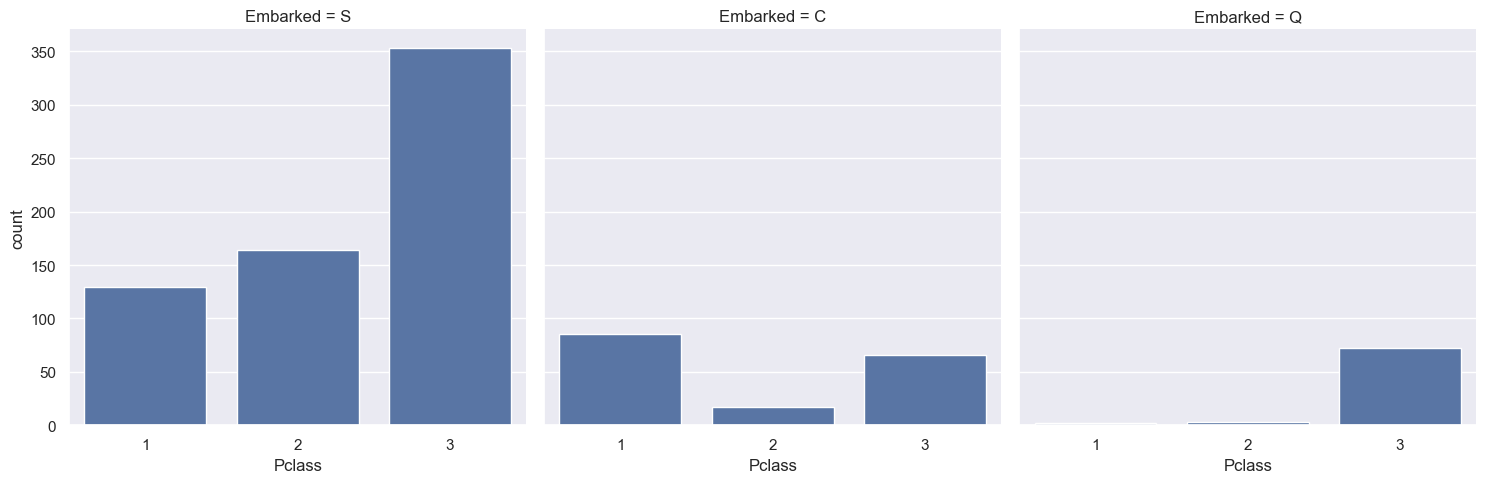

In [81]:
sns.catplot(data=data,x='Pclass',col='Embarked',kind='count')

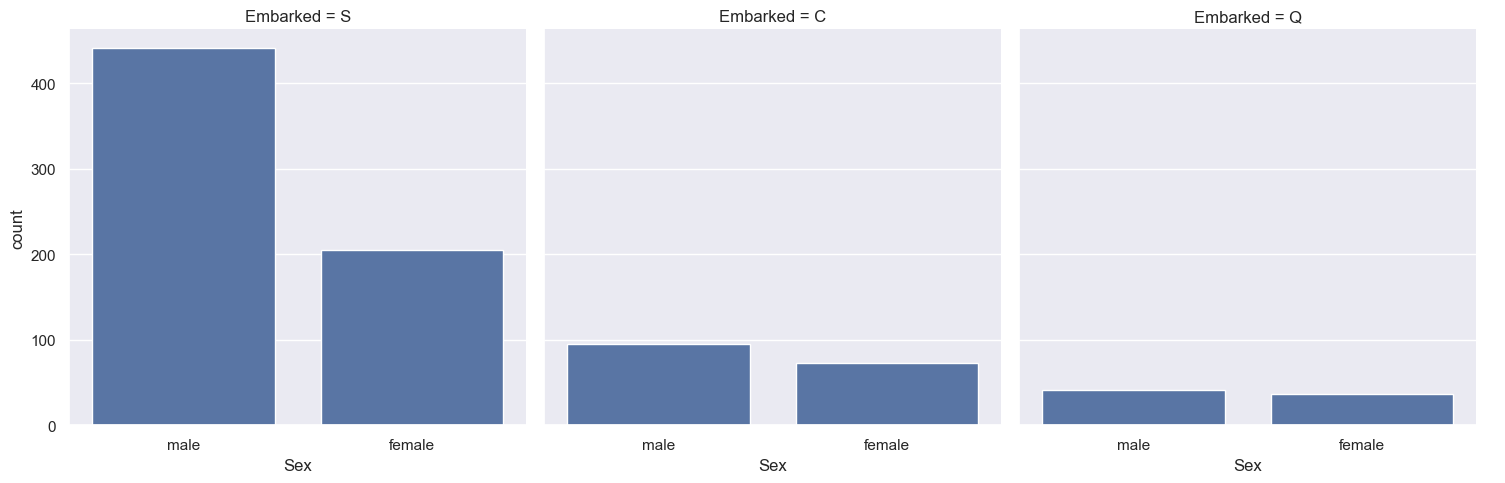

In [83]:
sns.catplot(data=data,x='Sex',col='Embarked',kind='count')

In [9]:
mean=data['Age'].mean()
std=data['Age'].std()
is_null=data['Age'].isna().sum()
rand_age=np.random.randint(mean-std,mean+std,size=is_null)
a=data['Age'].copy()
a[np.isnan(a)]=rand_age
data['Age']=a
data['Age'].isna().sum()

0

In [88]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [96]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
genders={'male':0,'female':1}
embark={'S':0,'C':1,'Q':2}
data['Sex']=data['Sex'].map(genders)
data['Embarked']=data['Embarked'].map(embark)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [ ]:
# Do this with data dataset and df dataset

In [98]:
x=df_copy.drop('Survived',axis=1)
y=df_copy['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [99]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Classifier

In [14]:
log_reg=LogisticRegression()
rf_classifier=RandomForestClassifier(1000)
knn_classifier=KNeighborsClassifier()
dt_classifier=DecisionTreeClassifier()
sv_classifier=SVC()

In [100]:
log_reg.fit(x_train,y_train)
rf_classifier.fit(x_train,y_train)
knn_classifier.fit(x_train,y_train)
dt_classifier.fit(x_train,y_train)
sv_classifier.fit(x_train,y_train)

SVC()

In [101]:
log_reg_ypred=log_reg.predict(x_test)
rf_classifier_ypred=rf_classifier.predict(x_test)
knn_classifier_ypred=knn_classifier.predict(x_test)
dt_classifier_ypred=dt_classifier.predict(x_test)
sv_classifier_ypred=sv_classifier.predict(x_test)

In [102]:
from sklearn.metrics import accuracy_score
log_reg_acc=accuracy_score(y_test,log_reg_ypred)
rf_classifier_acc=accuracy_score(y_test,rf_classifier_ypred)
knn_classifier_acc=accuracy_score(y_test,knn_classifier_ypred)
dt_classifier_acc=accuracy_score(y_test,dt_classifier_ypred)
sv_classifier_acc=accuracy_score(y_test,sv_classifier_ypred)

In [20]:
# For data dataset
print("Logistic Regression           :",round(log_reg_acc*100,2))
print("Random Forest Classifier      :",round(rf_classifier_acc*100,2))
print("K Nearest Neighbors Classifier:",round(knn_classifier_acc*100,2))
print("Decision Tree Classifier      :",round(dt_classifier_acc*100,2))
print("Support Vector Classifier     :",round(sv_classifier_acc*100,2))

Logistic Regression           : 80.97
Random Forest Classifier      : 79.48
K Nearest Neighbors Classifier: 77.99
Decision Tree Classifier      : 75.75
Support Vector Classifier     : 81.72


In [103]:
# For df dataset
print("Logistic Regression           :",round(log_reg_acc*100,2))
print("Random Forest Classifier      :",round(rf_classifier_acc*100,2))
print("K Nearest Neighbors Classifier:",round(knn_classifier_acc*100,2))
print("Decision Tree Classifier      :",round(dt_classifier_acc*100,2))
print("Support Vector Classifier     :",round(sv_classifier_acc*100,2))

Logistic Regression           : 78.73
Random Forest Classifier      : 80.97
K Nearest Neighbors Classifier: 81.34
Decision Tree Classifier      : 79.85
Support Vector Classifier     : 82.46


# Another Way

In [78]:
df=pd.read_csv('https://raw.githubusercontent.com/AshishJangra27/Machine-Learning-with-Python-GFG/refs/heads/main/Titanic/titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
df['Age']=df['Age'].fillna(-0.5)
df['Age'].isna().sum()

0

In [80]:
bins=[-1,0,5,12,18,24,35,60,np.inf]
labels=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']
df['AgeGroup']=pd.cut(df['Age'],bins,labels=labels)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


<Axes: xlabel='AgeGroup', ylabel='Survived'>

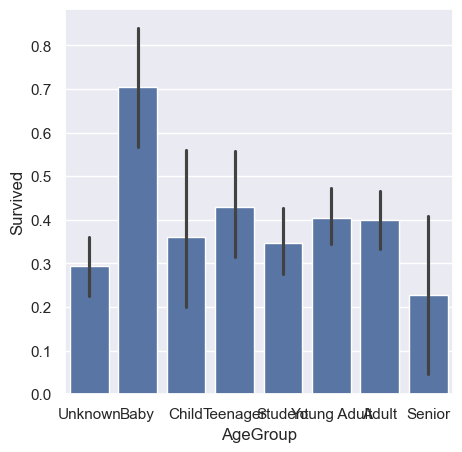

In [71]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data=df,x='AgeGroup',y='Survived')

In [82]:
df['Title']=df.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(df['Title'],df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [83]:
df['Title']=df['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Jonkheer'],'Rare')
df['Title']=df['Title'].replace(['Countess','Lady','Sir'],'Royal')
df['Title']=df['Title'].replace(['Mlle','Ms'],'Miss')
df['Title']=df['Title'].replace('Mme','Mrs')
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare', 'Royal'], dtype=object)

In [84]:
title_mapping={'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Rare':4, 'Royal':5}
df['Title']=df['Title'].map(title_mapping)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0


In [85]:
age_lst=[]
for i in range(6):
    age_lst.append(df[df['Title']==i]['AgeGroup'].mode())
age_lst

[0    Young Adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    Adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    Unknown
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    Baby
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    Adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'],
 0    Adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']]

In [86]:
age_map={0:'Young Adult',1:'Adult',2:'Student',3:'Baby',4:'Adult',5:'Adult'}
for i in range(len(df['AgeGroup'])):
    if df['AgeGroup'][i]=='Unknown':
        df['AgeGroup'][i]=age_map[df['Title'][i]]
df['AgeGroup'].isna().sum()

0

In [87]:
df['AgeGroup'].unique()

['Student', 'Adult', 'Young Adult', 'Baby', 'Teenager', 'Child', 'Senior']
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

In [88]:
df_copy=df.copy()

In [94]:
le=LabelEncoder()
transform=['Sex','AgeGroup','Embarked']
for i in transform:
    df_copy[i]=le.fit_transform(df_copy[i])

In [95]:
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,4,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,6,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,6,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,6,0


In [96]:
df_copy.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [97]:
df_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,0,3,1,22.0,1,0,7.2500,2,4,0
1,1,1,0,38.0,1,0,71.2833,0,0,1
2,1,3,0,26.0,0,0,7.9250,2,6,2
3,1,1,0,35.0,1,0,53.1000,2,6,1
4,0,3,1,35.0,0,0,8.0500,2,6,0


# Using Multi-Layer Perceptron Model

In [52]:
import random
random.seed(101)

In [4]:
data1=data.copy()
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
dict_live={0:"Died",1:"Survived"}
dict_sex={'male':0,'female':1}
data1['BSex']=data1["Sex"].apply(lambda x:dict_sex[x])
features=data1[['Pclass','BSex']].to_numpy()
labels=data1['Survived'].to_numpy()

In [54]:
def Sigmoid(x,derivative=False):
    f=1/(1+np.exp(-x))
    if derivative==True:
        return f*(1-f)
    else:
        return f
def ReLU(x,derivative=False):
    if derivative==True:
        return np.heaviside(x,1)
    else:
        return np.maximum(x,0)

In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.3,random_state=101)
xtrain.shape

(623, 2)

In [56]:
def train_ANN(xtrain,ytrain,h1_units=4,h2_units=4,learning_rate=0.0015):
    random.seed(101)
    #hidden layer 1,2,output layer
    w1=2*np.random.rand(h1_units,xtrain.shape[1])
    b1=np.random.rand(h1_units)
    w2=2*np.random.rand(h2_units,h1_units)
    b2=np.random.rand(h2_units)
    w_out=2*np.random.rand(h1_units)
    b_out=np.random.rand(1)
    loss=[]
    vec_y=[]
    for i in range(0,xtrain.shape[0]):
        x_data=xtrain[i]
        # Forward propagation
        h1=ReLU(np.dot(w1,x_data)+b1)
        h2=ReLU(np.dot(w2,h1)+b2)
        y=Sigmoid(np.dot(w_out,h2)+b_out)
        # Backward propagation
        delta_out=(y-ytrain[i])*Sigmoid(y,True)
        delta_2=delta_out*w_out*ReLU(h2,True)
        delta_1=np.dot(delta_2,w2)*ReLU(h1,True)
        # Gradient Descent
        w_out=w_out-learning_rate*delta_out*h2
        b_out=b_out-learning_rate*delta_out
        w2=w2-learning_rate*np.kron(delta_2,h1).reshape(h2_units,h1_units)
        b2=b2-learning_rate*delta_2
        w1=w1-learning_rate*np.kron(delta_1,x_data).reshape(h1_units,x_data.shape[0])
        b1=b1-learning_rate*delta_1
        # cost
        loss.append((1/2)*(y-ytrain[i])**2)
        vec_y.append(y[0])
    batch_loss=[]
    for i in range(0,10):
        loss_avg=0
        for m in range(0,60):
            loss_avg+=vec_y[i*60+m]/60
        batch_loss.append(loss_avg)
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(1,len(batch_loss)+1),batch_loss)
    plt.title("Average loss by epoch")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    return w1,b1,w2,b2,w_out,b_out,loss

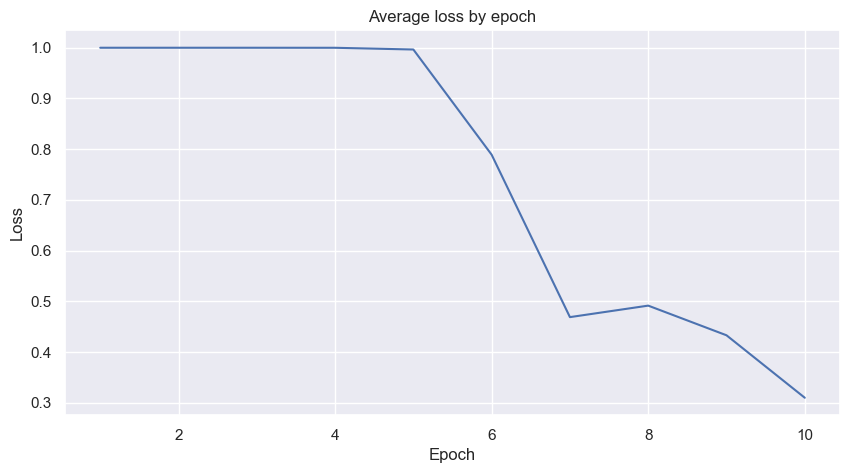

In [57]:
w1,b1,w2,b2,w_out,b_out,loss=train_ANN(xtrain,ytrain)

In [58]:
def ANN_pred(xtest,w1,b1,w2,b2,w_out,b_out,loss):
    pred=[]
    for i in range(0,xtest.shape[0]):
        x=xtest[i]
        # Feed forward
        h1=ReLU(np.dot(w1,x)+b1)
        h2=ReLU(np.dot(w2,h1)+b2)
        y=Sigmoid(np.dot(w_out,h2)+b_out)
        pred.append(np.heaviside(y-0.5,1)[0])
    return np.array(pred)

<Axes: >

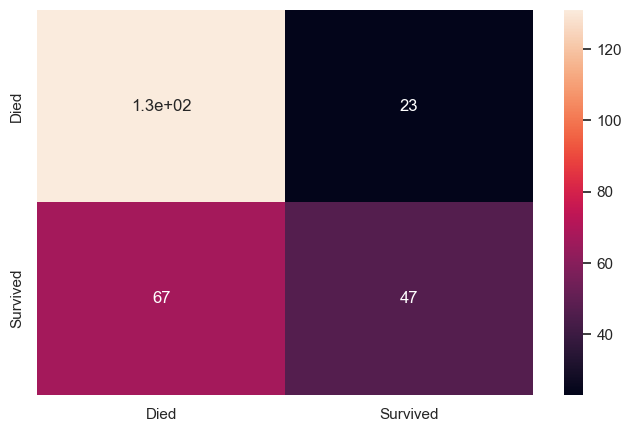

In [59]:
predictions=ANN_pred(xtest,w1,b1,w2,b2,w_out,b_out,loss)
cm=confusion_matrix(ytest,predictions)
df_cm=pd.DataFrame(cm,index=[dict_live[i] for i in range(0,2)],columns=[dict_live[i] for i in range(0,2)])
plt.figure(figsize=(8,5))
sns.heatmap(df_cm,annot=True)

In [60]:
accuracy_score(ytest,predictions)

0.664179104477612